In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.special import exp1,factorial
from scipy.stats import binom,nbinom
from scipy.special import gammaln

In [47]:
plt.rcParams['font.family']='Arial'
plt.rcParams['axes.labelsize'] = 8    
plt.rcParams['axes.titlesize'] = 9    
plt.rcParams['xtick.labelsize'] = 8   
plt.rcParams['ytick.labelsize'] = 8 
plt.rcParams['legend.fontsize'] = 8

In [48]:
### Functions for theory

def get_lc(sigma,s):
    return np.sqrt(sigma**2/s)

def get_lambda_theory(w,sigma,s):
    lc = get_lc(sigma,s)
    term = (w / lc) ** 2
    if term <= 800:
        prod_term = np.exp(term) * exp1(term)
    else:
        prod_term = sum((factorial(k) / (-term)**k for k in range(7))) / term
    return (4*np.pi)/prod_term

def get_EP_theory(mu, s):
    return mu / s

def get_EPsquared_theory(mu, s, rho, sigma, w):
    lcs = get_lc(sigma, s)**2
    term = (w / np.sqrt(lcs)) ** 2
    if term <= 800:
        prod_term = np.exp(term) * exp1(term)
    else:
        prod_term = sum((factorial(k) / (-term)**k for k in range(7))) / term
    return (mu / (s ** 2 * rho * 4 * np.pi * lcs)) * prod_term + mu ** 2 / s ** 2

def get_sfs_theory(x,n,mu,s,rho,sigma,w):
    mean = get_EP_theory(mu,s)
    var = get_EPsquared_theory(mu,s,rho,sigma,w) - mean**2
    alpha = mean**2/var
    beta = mean/var
    return nbinom.pmf(x,alpha,beta/(beta+n))

def get_sfs_theory_unif(x,n,mu,s,N):
    mean = mu/s
    var = mu/(s*s*N)
    alpha = mean**2/var
    beta = mean/var
    return nbinom.pmf(x,alpha,beta/(beta+n))

In [49]:
def get_obs_dist(width,vartype,scale_factor,centers): # return counts: scale factor should be equal to prop_kept
    obs_dist_list = []
    if width is not None: # not uniform
        for center in centers: # average over centers
            sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_freq/chr1_{vartype}_{center}geo{width}_nSIR10000_nSIRreps10.SIRfreq.sfs', sep='\t')
            sfs_grouped = sfs.groupby('COUNT')['SFS_COUNTS'].agg(['mean', 'std']) # average over replicates
            obs_dist_temp = sfs_grouped['mean'] / scale_factor # scale to adjust for downsampling
            obs_dist_list.append(obs_dist_temp)
        obs_dist = np.mean(obs_dist_list,axis=0)
    else: # uniform
        sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs_freq/chr1_{vartype}_uniformgeo_nSIR10000_nSIRreps10.SIRfreq.sfs', sep='\t')
        sfs_grouped = sfs.groupby('COUNT')['SFS_COUNTS'].agg(['mean', 'std']) # average over replicates
        obs_dist = sfs_grouped['mean'] / scale_factor # scale to adjust for downsampling
    return obs_dist

In [19]:
# res = pd.read_csv('res1.csv')
# res

In [50]:
mu = 1.25e-8
maxval=10
n=10000
widths_data=['50000','100000','150000']#,None]
centers=['centerE9N9','centerE16N4','centerE6N4']
vartypes=['synonymous','missense','lof']


In [51]:
### Scale factors for y axis - from empiriaclplots_v20250217

len_syn = 1308.0216666666665
len_mis = 2616.043333333333
len_lof = 167.616

prop_kept_syn = 32320/247378
prop_kept_mis = 32320/505963
prop_kept_lof = 1

scale_factors=[prop_kept_syn, prop_kept_mis, 1]

In [52]:
sfs_data = pd.read_csv('sfs_binned_summary_unbinned.csv')

In [53]:
sfs_data

,Variant_Type,Panel,Count,SFS,Std
0,synonymous,H,0,154.739765,0.192521
1,synonymous,H,1,12.231019,0.222819
2,synonymous,H,2,4.828157,0.149606
3,synonymous,H,3,2.686471,0.140613
4,synonymous,H,4,1.782983,0.103067
...,...,...,...,...,...
23995,lof,C,995,0.000199,0.001089
23996,lof,C,996,0.000199,0.001089
23997,lof,C,997,0.000199,0.001089
23998,lof,C,998,0.000000,0.000000


In [54]:
res_df1 = pd.read_csv("../empirical/subsampling_SIR_v20250127/notebooks/res_w50_w100_w150_minx1_sigma500_rho7.5_mu1.25_sfs_freq.csv")
res_df2 = pd.read_csv("../empirical/subsampling_SIR_v20250127/notebooks/res_w50_w100_w150_minx2_sigma500_rho7.5_mu1.25_sfs_freq.csv")
res_df3 = pd.read_csv("../empirical/subsampling_SIR_v20250127/notebooks/res_w50_w100_w150_minx3_sigma500_rho7.5_mu1.25_sfs_freq.csv")

In [55]:
res_df1

,sigma,rho,s,w,mu,logl
0,21.367347,1.530692,0.007017,multi,1.250000e-08,-1.153108e+03
1,31.551020,0.918455,0.007017,multi,1.250000e-08,-1.403923e+03
2,72.285714,0.306218,0.007017,multi,1.250000e-08,-1.952235e+03
3,133.387755,0.153159,0.008377,multi,1.250000e-08,-2.813136e+03
4,500.000000,0.000100,0.000100,multi,1.250000e-08,-2.553798e+04
...,...,...,...,...,...,...
99995,489.816327,7.346941,0.000100,multi,1.250000e-08,-6.668903e+06
99996,500.000000,7.193882,0.000100,multi,1.250000e-08,-6.669055e+06
99997,489.816327,7.500000,0.000100,multi,1.250000e-08,-6.669090e+06
99998,500.000000,7.346941,0.000100,multi,1.250000e-08,-6.669243e+06


In [56]:
res_df2

,sigma,rho,s,w,mu,logl
0,21.367347,1.224573,0.007017,multi,1.250000e-08,-3.243186e+02
1,41.734694,0.459278,0.007017,multi,1.250000e-08,-3.878310e+02
2,92.653061,0.153159,0.007017,multi,1.250000e-08,-4.430492e+02
3,133.387755,0.153159,0.008377,multi,1.250000e-08,-1.599000e+03
4,500.000000,0.000100,0.000100,multi,1.250000e-08,-4.848565e+03
...,...,...,...,...,...,...
99995,489.816327,7.346941,0.000100,multi,1.250000e-08,-5.314038e+06
99996,500.000000,7.193882,0.000100,multi,1.250000e-08,-5.314257e+06
99997,489.816327,7.500000,0.000100,multi,1.250000e-08,-5.314308e+06
99998,500.000000,7.346941,0.000100,multi,1.250000e-08,-5.314529e+06


In [57]:
res_df3

,sigma,rho,s,w,mu,logl
0,51.918367,0.306218,0.007017,multi,1.250000e-08,-1.882801e+02
1,82.469388,0.153159,0.007017,multi,1.250000e-08,-1.886783e+02
2,31.551020,0.612337,0.007017,multi,1.250000e-08,-2.020099e+02
3,133.387755,0.153159,0.008377,multi,1.250000e-08,-1.192735e+03
4,479.632653,0.000100,0.000119,multi,1.250000e-08,-1.849942e+03
...,...,...,...,...,...,...
99995,489.816327,7.346941,0.000100,multi,1.250000e-08,-3.419476e+06
99996,500.000000,7.193882,0.000100,multi,1.250000e-08,-3.419572e+06
99997,489.816327,7.500000,0.000100,multi,1.250000e-08,-3.419594e+06
99998,500.000000,7.346941,0.000100,multi,1.250000e-08,-3.419690e+06


In [58]:
lof_min1 = pd.read_csv('../empirical/subsampling_SIR_v20250127/notebooks/lof_min1_sfs_freq.csv')
lof_min2 = pd.read_csv('../empirical/subsampling_SIR_v20250127/notebooks/lof_min2_sfs_freq.csv')
lof_min3 = pd.read_csv('../empirical/subsampling_SIR_v20250127/notebooks/lof_min3_sfs_freq.csv')

In [79]:
sfs_data

,Variant_Type,Panel,Count,SFS,Std
0,synonymous,H,0,154.739765,0.192521
1,synonymous,H,1,12.231019,0.222819
2,synonymous,H,2,4.828157,0.149606
3,synonymous,H,3,2.686471,0.140613
4,synonymous,H,4,1.782983,0.103067
...,...,...,...,...,...
23995,lof,C,995,0.000199,0.001089
23996,lof,C,996,0.000199,0.001089
23997,lof,C,997,0.000199,0.001089
23998,lof,C,998,0.000000,0.000000


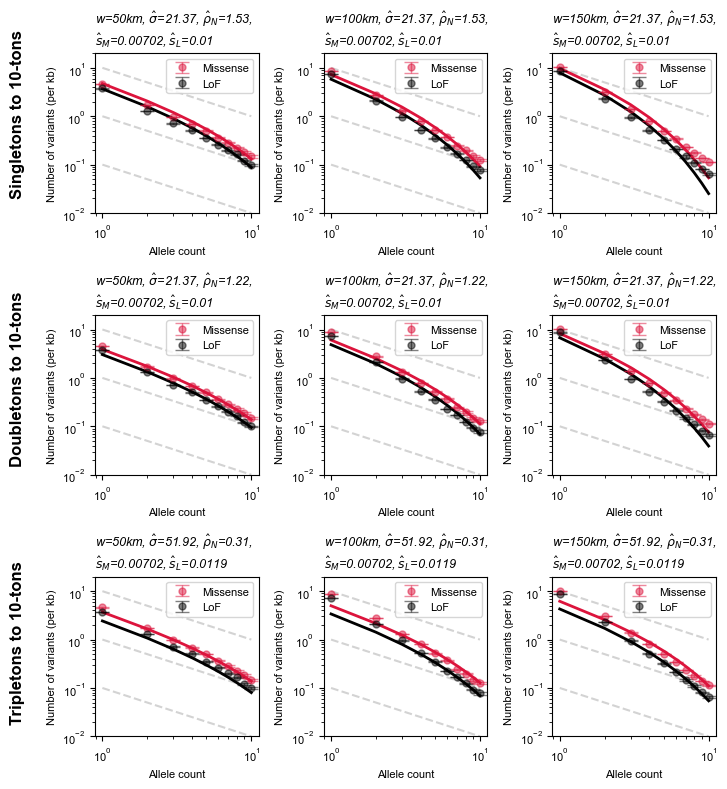

In [102]:
colors = ['#DC143C','black']#['orchid', 'darkorange']
widths_theory = [50, 100, 150]#, 500]
Lscale = [len_syn, len_mis, len_lof]
x = np.logspace(0, 1)
y = x**-1
panels_cap = ['A','B','C']
vt_cap = ['Missense','LoF']
vartypes=['missense','lof']
fig, ax = plt.subplots(3, 3, figsize=(7.01, 8))
titles = ['Singletons to 10-tons','Doubletons to 10-tons','Tripletons to 10-tons']
for k in range(3):
    fig.text(-0.02, 0.85 - k * 0.33, titles[k], fontsize=12, fontweight='bold', rotation=90, va='center', ha='center')
n=20000
rho_vals = [res_df1.iloc[0]['rho'],res_df2.iloc[0]['rho'],res_df3.iloc[0]['rho']]
sig_vals = [res_df1.iloc[0]['sigma'],res_df2.iloc[0]['sigma'],res_df3.iloc[0]['sigma']]
s_vals = [res_df1.iloc[0]['s'],res_df2.iloc[0]['s'],res_df3.iloc[0]['s']]
# s_lof_vals = [0.007017,0.010000,0.010000]
s_lof_vals=[lof_min1.iloc[0]['s'],lof_min2.iloc[0]['s'],lof_min3.iloc[0]['s']]
maxval=11
for k in [0,1,2]:
    rho = rho_vals[k]
    sigma = sig_vals[k]
    s = s_vals[k]
    s_lof = s_lof_vals[k]
    for i in [0, 1,2]:
        ax[k,i].loglog(x, y, color='lightgray', linestyle='--')
        ax[k,i].loglog(x, y * 10, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y * 50, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y * 100, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y / 100, color='lightgray', linestyle='--')
        ax[k,i].loglog(x, y / 10, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y / 50, color='lightgray', linestyle='--')
    
    for j, w in enumerate(widths_theory):
        nb_dist = [get_sfs_theory(y, n, mu, s, rho, sigma, w) * 1000 for y in np.arange(0, maxval)] # plot per kb
        ax[k,j].loglog(np.arange(1, maxval), nb_dist[1:], marker=None, linestyle='-', linewidth=2, alpha=1, color=colors[0])
        nb_dist_lof = [get_sfs_theory(y, n, mu, s_lof, rho, sigma, w) * 1000 for y in np.arange(0, maxval)] # plot per kb
        ax[k,j].loglog(np.arange(1, maxval), nb_dist_lof[1:], marker=None, linestyle='-', linewidth=2, alpha=1, color=colors[1])


    
    for j, wid in enumerate(widths_data):
        for i, vt in enumerate(vartypes):
            sfs_data_sub = sfs_data[(sfs_data['Variant_Type']==vartypes[i])&(sfs_data['Panel']==panels_cap[j])]
            # sfs_data_sub['SFS'] = pd.to_numeric(sfs_data_sub['SFS'], errors='coerce')
            # sfs_data_sub['Std']=pd.to_numeric(sfs_data_sub['Std'],errors='coerce')
            ax[k,j].errorbar(sfs_data_sub['Count'][:maxval], sfs_data_sub['SFS'][:maxval], yerr=2*sfs_data_sub['Std'][:maxval]/np.sqrt(10), 
                        label=vt_cap[i], linestyle='', marker='o', capsize=5, markersize=5, elinewidth=1, alpha=0.5, color=colors[i])
            # sfs = get_obs_dist(wid, vt, scale_factors[i], centers=centers)
            # sfs_kb = [x / Lscale[i] for x in sfs] # plot per kb
            # ax[k,j].loglog(np.arange(1, maxval), sfs_kb[1:maxval], marker='o', markersize=5, markeredgecolor=None,alpha=1,color=colors[i], linestyle='', label=vt_cap[i])
    
    for i in [0, 1, 2]:
        ax[k,i].set_ylim(1e-2, 2e1)
        ax[k,i].legend(frameon=True, loc = 'upper right')
    
    ax[k,0].set_title(f'w=50km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,5)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
                   fontstyle='italic', loc='left')
    ax[k,1].set_title(f'w=100km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,5)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
                       fontstyle='italic', loc='left')
    ax[k,2].set_title(f'w=150km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,5)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
                       fontstyle='italic', loc='left')

    
    # plt.show()
    for i in [0,1,2]:
        ax[k,i].set_xlabel("Allele count")
        ax[k,i].set_ylabel("Number of variants (per kb)")
        

plt.tight_layout()
plt.savefig('theory_data_fit_3by3_v20250327.pdf', bbox_inches='tight')
plt.show()


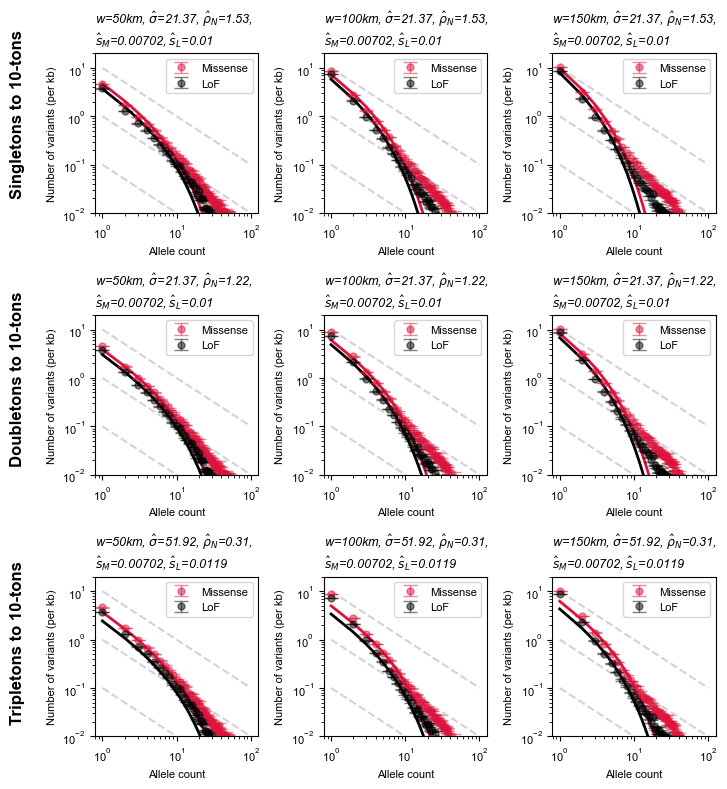

In [105]:
colors = ['#DC143C','black']#['orchid', 'darkorange']
widths_theory = [50, 100, 150]#, 500]
Lscale = [len_syn, len_mis, len_lof]
x = np.logspace(0, 2)
y = x**-1
panels_cap = ['A','B','C']
vt_cap = ['Missense','LoF']
vartypes=['missense','lof']
fig, ax = plt.subplots(3, 3, figsize=(7.01, 8))
titles = ['Singletons to 10-tons','Doubletons to 10-tons','Tripletons to 10-tons']
for k in range(3):
    fig.text(-0.02, 0.85 - k * 0.33, titles[k], fontsize=12, fontweight='bold', rotation=90, va='center', ha='center')
n=20000
rho_vals = [res_df1.iloc[0]['rho'],res_df2.iloc[0]['rho'],res_df3.iloc[0]['rho']]
sig_vals = [res_df1.iloc[0]['sigma'],res_df2.iloc[0]['sigma'],res_df3.iloc[0]['sigma']]
s_vals = [res_df1.iloc[0]['s'],res_df2.iloc[0]['s'],res_df3.iloc[0]['s']]
# s_lof_vals = [0.007017,0.010000,0.010000]
s_lof_vals=[lof_min1.iloc[0]['s'],lof_min2.iloc[0]['s'],lof_min3.iloc[0]['s']]
maxval=101
for k in [0,1,2]:
    rho = rho_vals[k]
    sigma = sig_vals[k]
    s = s_vals[k]
    s_lof = s_lof_vals[k]
    for i in [0, 1,2]:
        ax[k,i].loglog(x, y, color='lightgray', linestyle='--')
        ax[k,i].loglog(x, y * 10, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y * 50, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y * 100, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y / 100, color='lightgray', linestyle='--')
        ax[k,i].loglog(x, y / 10, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y / 50, color='lightgray', linestyle='--')
    
    for j, w in enumerate(widths_theory):
        nb_dist = [get_sfs_theory(y, n, mu, s, rho, sigma, w) * 1000 for y in np.arange(0, maxval)] # plot per kb
        ax[k,j].loglog(np.arange(1, maxval), nb_dist[1:], marker=None, linestyle='-', linewidth=2, alpha=1, color=colors[0])
        nb_dist_lof = [get_sfs_theory(y, n, mu, s_lof, rho, sigma, w) * 1000 for y in np.arange(0, maxval)] # plot per kb
        ax[k,j].loglog(np.arange(1, maxval), nb_dist_lof[1:], marker=None, linestyle='-', linewidth=2, alpha=1, color=colors[1])


    
    for j, wid in enumerate(widths_data):
        for i, vt in enumerate(vartypes):
            sfs_data_sub = sfs_data[(sfs_data['Variant_Type']==vartypes[i])&(sfs_data['Panel']==panels_cap[j])]
            # sfs_data_sub['SFS'] = pd.to_numeric(sfs_data_sub['SFS'], errors='coerce')
            # sfs_data_sub['Std']=pd.to_numeric(sfs_data_sub['Std'],errors='coerce')
            ax[k,j].errorbar(sfs_data_sub['Count'][:maxval], sfs_data_sub['SFS'][:maxval], yerr=2*sfs_data_sub['Std'][:maxval]/np.sqrt(10), 
                        label=vt_cap[i], linestyle='', marker='o', capsize=5, markersize=5, elinewidth=1, alpha=0.5, color=colors[i])
            # sfs = get_obs_dist(wid, vt, scale_factors[i], centers=centers)
            # sfs_kb = [x / Lscale[i] for x in sfs] # plot per kb
            # ax[k,j].loglog(np.arange(1, maxval), sfs_kb[1:maxval], marker='o', markersize=5, markeredgecolor=None,alpha=1,color=colors[i], linestyle='', label=vt_cap[i])
    
    for i in [0, 1, 2]:
        ax[k,i].set_ylim(1e-2, 2e1)
        ax[k,i].legend(frameon=True, loc = 'upper right')
    
    ax[k,0].set_title(f'w=50km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,5)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
                   fontstyle='italic', loc='left')
    ax[k,1].set_title(f'w=100km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,5)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
                       fontstyle='italic', loc='left')
    ax[k,2].set_title(f'w=150km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,5)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
                       fontstyle='italic', loc='left')

    
    # plt.show()
    for i in [0,1,2]:
        ax[k,i].set_xlabel("Allele count")
        ax[k,i].set_ylabel("Number of variants (per kb)")
        

plt.tight_layout()
plt.savefig('theory_data_fit_3by3_v20250327_extendedrange.pdf', bbox_inches='tight')
plt.show()


In [106]:
# sfs_data_sub

In [68]:
# # just for min 1 case
# maxval = 100
# colors = ['#DC143C','black']#['orchid', 'darkorange']
# widths_theory = [50, 100, 150]#, 500]
# Lscale = [len_syn, len_mis, len_lof]
# x = np.logspace(0, 2)
# y = x**-1
# vt_cap = ['Missense','LoF']
# vartypes=['missense','lof']
# fig, ax = plt.subplots(3, 3, figsize=(10, 10))
# titles = ['Singletons to 10-tons','Doubletons to 10-tons','Tripletons to 10-tons']
# for k in range(3):
#     fig.text(-0.02, 0.85 - k * 0.33, titles[k], fontsize=12, fontweight='bold', rotation=90, va='center', ha='center')
# n=20000
# rho_vals = [res_df1.iloc[0]['rho'],res_df2.iloc[0]['rho'],res_df3.iloc[0]['rho']]
# sig_vals = [res_df1.iloc[0]['sigma'],res_df2.iloc[0]['sigma'],res_df3.iloc[0]['sigma']]
# s_vals = [res_df1.iloc[0]['s'],res_df2.iloc[0]['s'],res_df3.iloc[0]['s']]
# # s_lof_vals = [0.007017,0.010000,0.010000]
# s_lof_vals=[lof_min1.iloc[0]['s'],lof_min2.iloc[0]['s'],lof_min3.iloc[0]['s']]
# for k in [0,1,2]:
#     rho = rho_vals[k]
#     sigma = sig_vals[k]
#     s = s_vals[k]
#     s_lof = s_lof_vals[k]
#     for i in [0, 1,2]:
#         ax[k,i].loglog(x, y, color='lightgray', linestyle='--')
#         ax[k,i].loglog(x, y * 10, color='lightgray', linestyle='--')
#         # ax[k,i].loglog(x, y * 50, color='lightgray', linestyle='--')
#         ax[k,i].loglog(x, y * 100, color='lightgray', linestyle='--')
#         ax[k,i].loglog(x, y / 100, color='lightgray', linestyle='--')
#         ax[k,i].loglog(x, y / 10, color='lightgray', linestyle='--')
#         # ax[k,i].loglog(x, y / 50, color='lightgray', linestyle='--')
    
#     for j, w in enumerate(widths_theory):
#         nb_dist = [get_sfs_theory(y, n, mu, s, rho, sigma, w) * 1000 for y in np.arange(0, maxval)] # plot per kb
#         ax[k,j].loglog(np.arange(1, maxval), nb_dist[1:], marker=None, linestyle='-', linewidth=2, alpha=1, color=colors[0])
#         nb_dist_lof = [get_sfs_theory(y, n, mu, s_lof, rho, sigma, w) * 1000 for y in np.arange(0, maxval)] # plot per kb
#         ax[k,j].loglog(np.arange(1, maxval), nb_dist_lof[1:], marker=None, linestyle='-', linewidth=2, alpha=1, color=colors[1])


    
#     for j, wid in enumerate(widths_data):
#         for i, vt in enumerate(vartypes):
#             sfs = get_obs_dist(wid, vt, scale_factors[i], centers=centers)
#             sfs_kb = [x / Lscale[i] for x in sfs] # plot per kb
#             ax[k,j].loglog(np.arange(1, maxval), sfs_kb[1:maxval], marker='o', markersize=5, markeredgecolor=None,alpha=0.5,color=colors[i], linestyle='', label=vt_cap[i])
    
#     for i in [0, 1, 2]:
#         ax[k,i].set_ylim(1e-2, 2e1)
#         ax[k,i].legend(frameon=True, loc = 'upper right')
    
#     ax[k,0].set_title(f'w=50km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,4)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
#                    fontstyle='italic', loc='left')
#     ax[k,1].set_title(f'w=100km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,4)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
#                        fontstyle='italic', loc='left')
#     ax[k,2].set_title(f'w=150km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,4)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
#                        fontstyle='italic', loc='left')

    
#     # plt.show()
#     for i in [0,1,2]:
#         ax[k,i].set_xlabel("Allele count")
#         ax[k,i].set_ylabel("Number of variants (per kb)")
        

# plt.tight_layout()
# # plt.savefig('theory_data_fit_3by3_v5.pdf', bbox_inches='tight')
# plt.show()


In [22]:
# colors = ['#DC143C','black']#['orchid', 'darkorange']
# widths_theory = [50, 100, 150]#, 500]
# Lscale = [len_syn, len_mis, len_lof]
# x = np.logspace(0, 1)
# y = x**-1
# vt_cap = ['Missense','LoF']
# vartypes=['missense','lof']
# fig, ax = plt.subplots(3, 3, figsize=(7.01, 8))
# titles = ['Singletons to 10-tons','Doubletons to 10-tons','Tripletons to 10-tons']
# for k in range(3):
#     fig.text(-0.02, 0.85 - k * 0.33, titles[k], fontsize=12, fontweight='bold', rotation=90, va='center', ha='center')

# rho_vals = [res_df1.iloc[0]['rho'],res_df2.iloc[0]['rho'],res_df3.iloc[0]['rho']]
# sig_vals = [res_df1.iloc[0]['sigma'],res_df2.iloc[0]['sigma'],res_df3.iloc[0]['sigma']]
# s_vals = [res_df1.iloc[0]['s'],res_df2.iloc[0]['s'],res_df3.iloc[0]['s']]
# # s_lof_vals = [0.007017,0.010000,0.010000]
# s_lof_vals=[lof_min1.iloc[0]['s'],lof_min2.iloc[0]['s'],lof_min3.iloc[0]['s']]
# for k in [0,1,2]:
#     rho = rho_vals[k]
#     sigma = sig_vals[k]
#     s = s_vals[k]
#     s_lof = s_lof_vals[k]
#     for i in [0, 1,2]:
#         ax[k,i].loglog(x, y, color='lightgray', linestyle='--')
#         ax[k,i].loglog(x, y * 10, color='lightgray', linestyle='--')
#         # ax[k,i].loglog(x, y * 50, color='lightgray', linestyle='--')
#         # ax[k,i].loglog(x, y * 100, color='lightgray', linestyle='--')
#         # ax[k,i].loglog(x, y / 100, color='lightgray', linestyle='--')
#         ax[k,i].loglog(x, y / 10, color='lightgray', linestyle='--')
#         # ax[k,i].loglog(x, y / 50, color='lightgray', linestyle='--')
    
#     for j, w in enumerate(widths_theory):
#         nb_dist = [get_sfs_theory(y, n, mu, s, rho, sigma, w) * 1000 for y in np.arange(0, maxval)] # plot per kb
#         ax[k,j].loglog(np.arange(1, maxval), nb_dist[1:], marker=None, linestyle='-', linewidth=2, alpha=1, color=colors[0])
#         nb_dist_lof = [get_sfs_theory(y, n, mu, s_lof, rho, sigma, w) * 1000 for y in np.arange(0, maxval)] # plot per kb
#         ax[k,j].loglog(np.arange(1, maxval), nb_dist_lof[1:], marker=None, linestyle='-', linewidth=2, alpha=1, color=colors[1])


    
#     for j, wid in enumerate(widths_data):
#         for i, vt in enumerate(vartypes):
#             sfs = get_obs_dist(wid, vt, scale_factors[i], centers=centers)
#             sfs_kb = [x / Lscale[i] for x in sfs] # plot per kb
#             ax[k,j].loglog(np.arange(1, maxval), sfs_kb[1:maxval], marker='o', markersize=5, markeredgecolor=None,alpha=1,color=colors[i], linestyle='', label=vt_cap[i])
    
#     for i in [0, 1, 2]:
#         ax[k,i].set_ylim(1e-2, 2e1)
#         ax[k,i].legend(frameon=True, loc = 'upper right')
    
#     ax[k,0].set_title(f'w=50km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,4)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
#                    fontstyle='italic', loc='left')
#     ax[k,1].set_title(f'w=100km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,4)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
#                        fontstyle='italic', loc='left')
#     ax[k,2].set_title(f'w=150km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,4)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
#                        fontstyle='italic', loc='left')

    
#     # plt.show()
#     for i in [0,1,2]:
#         ax[k,i].set_xlabel("Allele count")
#         ax[k,i].set_ylabel("Number of variants (per kb)")
        

# plt.tight_layout()
# plt.savefig('theory_data_fit_3by3_v5.pdf', bbox_inches='tight')
# plt.show()


In [23]:
# rho_vals

In [24]:
# sig_vals

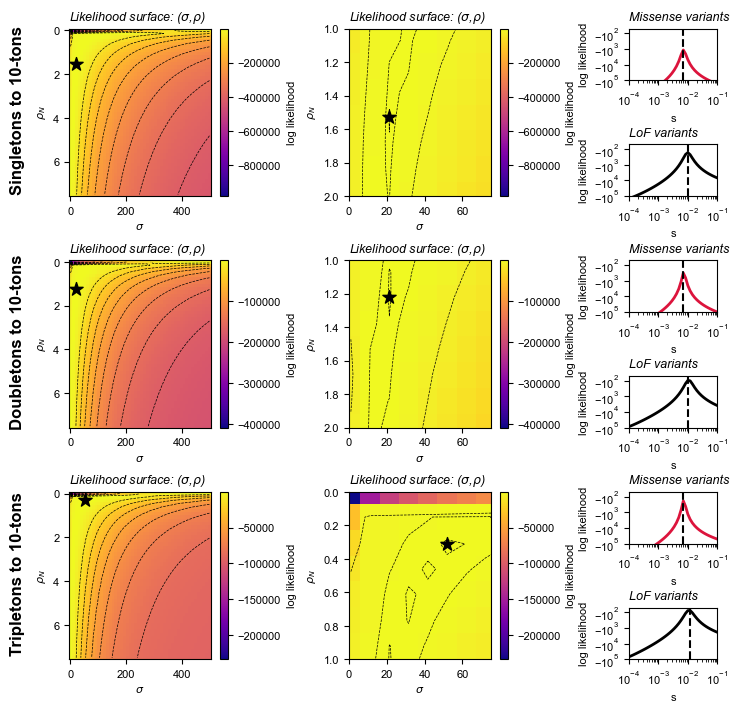

In [103]:

fig = plt.figure(figsize=(7.01, 7.01))
gs = fig.add_gridspec(6, 3, height_ratios=[1, 1, 1, 1, 1, 1],width_ratios=[1,1,0.5])  # Adjust the row height ratios

for k in range(3):
    fig.text(-0.02, 0.85 - k * 0.33, titles[k], fontsize=12, fontweight='bold', rotation=90, va='center', ha='center')


ax = [fig.add_subplot(gs[i:i+2, 0]) for i in range(0, 6, 2)]  # Left column (spanning 2 rows)
ax.extend([fig.add_subplot(gs[i:i+2, 1]) for i in range(0, 6, 2)])  # Middle column (spanning 2 rows)


ax.append(fig.add_subplot(gs[0, 2]))  
ax.append(fig.add_subplot(gs[1, 2]))  

ax.append(fig.add_subplot(gs[2, 2]))  
ax.append(fig.add_subplot(gs[3, 2]))  

ax.append(fig.add_subplot(gs[4, 2]))  
ax.append(fig.add_subplot(gs[5, 2]))  

# Your data
titles = ['Singletons to 10-tons', 'Doubletons to 10-tons', 'Tripletons to 10-tons']

for i, res_df in enumerate([res_df1, res_df2, res_df3]):
    sig_star = res_df.iloc[0]['sigma']
    rho_star = res_df.iloc[0]['rho']
    res_df['rho'] = res_df['rho'].round(2)
    res_df['sigma'] = res_df['sigma'].round(2)
    filtered_data = res_df.loc[res_df.groupby(['sigma', 'rho'])['logl'].idxmax()]

    rho_vals = np.unique(filtered_data['rho'])
    sigma_vals = np.unique(filtered_data['sigma'])

    Sigma, Rho = np.meshgrid(sigma_vals, rho_vals)
    LogL = filtered_data.pivot(index='rho', columns='sigma', values='logl').values

    logl_min = LogL.min()
    logl_max = LogL.max()
    contour_levels = np.linspace(logl_min, logl_max, 20)

    # Plot heatmap using pcolormesh for the first column (ax[i])
    heatmap = ax[i].pcolormesh(Sigma, Rho, LogL, cmap="plasma", shading='auto')
    cbar = fig.colorbar(heatmap, label='log likelihood', ax=ax[i])
    contours = ax[i].contour(Sigma, Rho, LogL, levels=contour_levels, colors='black', linewidths=0.5)
    ax[i].set_xlabel(r"$\sigma$")
    ax[i].set_ylabel(r"$\rho_N$")
    ax[i].set_title(r'Likelihood surface: ($\sigma$,$\rho$)', fontstyle='italic', loc='left')
    ax[i].invert_yaxis()
    ax[i].scatter(sig_star, rho_star, marker='*', color='black',s=100)

    # Zoomed-in heatmap for the second column (ax[i + 3])
    heatmap = ax[i + 3].pcolormesh(Sigma, Rho, LogL, cmap="plasma", shading='auto')
    cbar = fig.colorbar(heatmap, label='log likelihood', ax=ax[i + 3])
    # contours = ax[i+3].contour(Sigma, Rho, LogL, levels=contour_levels, colors='gray', linewidths=0.5)
    ax[i + 3].set_xlabel(r"$\sigma$")
    ax[i + 3].set_ylabel(r"$\rho_N$")
    ax[i + 3].set_title(r'Likelihood surface: ($\sigma$,$\rho$)', fontstyle='italic', loc='left')
    ax[i + 3].invert_yaxis()
    ax[i + 3].scatter(sig_star, rho_star, marker='*', color='black',s=100)
    ax[i + 3].set_xlim(0, 75)
    if i == 2:
        ax[i + 3].set_ylim(1, 0)
    else:
        ax[i + 3].set_ylim(2, 1)

    logl_max = LogL.max()
    logl_contour_levels =  sorted([logl_max - 100, logl_max - 1000, logl_max-10000]) #logl_max - 2, logl_max - 10, 
    contours_zoomed = ax[i + 3].contour(Sigma, Rho, LogL, levels=logl_contour_levels, colors='black', linewidths=0.5)
    # ax[i + 3].clabel(contours_zoomed, inline=True, fontsize=8, fmt='%.0f')



    # likelihood surface on s
    res_sub = res_df[(res_df['sigma']==sig_star)&(res_df['rho']==rho_star)]
    res_sub = res_sub.sort_values(by='s')
    ax[2*i+6].plot(res_sub['s'], 1*res_sub['logl'], marker=None, linestyle='-', linewidth=2,color=colors[0])
    ax[2*i+6].set_xscale('log')
    ax[2*i+6].set_yscale('symlog')
    # ax[2*i+6].set_yscale('symlog', linthresh=1e-10)  # Tiny linthresh removes the visible linear region
    ax[2*i+6].set_xlim(1e-4, 1e-1)
    ax[2*i+6].set_ylim(-1e5, -5e1)
    ax[2*i+6].axvline(x=s_vals[i],linewidth=1.5,color='black',linestyle='--')


    lof_min_list = [lof_min1, lof_min2, lof_min3]

    lof_min_list[i] = lof_min_list[i].sort_values(by='s')  # Sort by 's'
    ax[2*i+7].plot(lof_min_list[i]['s'], 1 * lof_min_list[i]['logl'], marker=None, linestyle='-', linewidth=2,color=colors[1])
    ax[2*i+7].axvline(x=s_lof_vals[i],linewidth=1.5,color='black',linestyle='--')


    ax[2*i+7].set_xscale('log')
    ax[2*i+7].set_xlim(1e-4,1e-1)
    ax[2*i+7].set_ylim(-1e5, -5e1)
    ax[2*i+7].set_yscale('symlog')
    
    ax[2*i+6].set_ylabel('log likelihood')
    ax[2*i+7].set_ylabel('log likelihood')
    ax[2*i+6].set_xlabel('s')
    ax[2*i+7].set_xlabel('s')
    ax[2*i+6].set_xlim(1e-4,1e-1)
    ax[2*i+6].set_title('Missense variants',loc='left',fontstyle='italic')
    ax[2*i+7].set_title('LoF variants',loc='left',fontstyle='italic')
        

# Adjust layout for the new grid configuration
plt.tight_layout(pad=0.3)
plt.savefig('likelihood_theorydata_v20250327.pdf', bbox_inches='tight')
plt.show()


In [107]:
# lof_min3

In [108]:
# res_df3[(res_df3['sigma']==sig_star)&(res_df3['rho']==rho_star)]